# Analise Harmonica

In [2]:
import pandas as pd
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import ttide as tt
import espec

%matplotlib inline

In [3]:
# Praticagem - Mare

dd = pd.read_csv('../data/proc/Praticagem_Mare_2016_int.csv', parse_dates=['date_hour'], index_col='date_hour')
dd.head(2)

,reg,regnr,prev,regnm
date_hour,,,,
2016-01-01 00:00:00,1.860,0.640,0.5,-0.332952
2016-01-01 01:00:00,1.885,0.675,0.5,-0.297952


In [4]:
# Carrega dados de vento

vento = pd.read_csv('../data/proc/Praticagem_Vento_2016_int.csv', parse_dates=['date_hour'], index_col='date_hour')
vento.head(2)

,ate,rh,bp,atemin,rh1,vis,ws,wsmax,wd,chuvaabs,chuvadif,chuvaint,atemax,rh2
date_hour,,,,,,,,,,,,,,
2016-01-01 00:00:00,31.242000,61.395500,1000.741500,31.215167,60.988167,2000.0,3.816833,3.409167,238.233000,330.67,0.0,0.0,31.364500,61.548167
2016-01-01 01:00:00,30.679833,62.641667,1000.418833,30.651833,62.432500,2000.0,4.282500,3.409167,234.936333,330.67,0.0,0.0,30.780167,62.850167


In [5]:
mare = tt.t_tide(dd.regnm, dt=1, lat=np.array(-25))

-----------------------------------
nobs = 8784 
ngood = 8783 
record length (days) = 366.00
rayleigh criterion = 1.0

Phases at central time
x0= -0.000109  xtrend= 0
var(data)= 0.14    var(prediction)= 0.10    var(residual)= 0.04
var(prediction)/var(data) (%) = 72.9

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
  SA    0.0001141     0.0569     0.058    358.84     58.84      0.96
  SSA   0.0002282     0.0599     0.057    264.34     55.90       1.1
  MSM   0.0013098     0.0346     0.045    131.44    109.19       0.6
  MM    0.0015122     0.0062     0.044    282.33    198.99      0.02
  MSF   0.0028219     0.0286     0.053    183.66    123.81      0.29
  MF    0.0030501     0.0047     0.042     97.60    255.42     0.013
  ALP1  0.0343966     0.0034     0.004    357.72     61.37      0.68
* 2Q1   0.0357064     0.0066     0.004    213.01     36.89       3.4
  SIG1  0.0359087     0.0052     0.004     85.53     47.

In [6]:
mare

{'dt': 1,
 'dz0': 0,
 'fu': array([ 0.00011407,  0.00022816,  0.00130978,  0.00151215,  0.00282193,
         0.00305009,  0.03439657,  0.03570635,  0.03590872,  0.0372185 ,
         0.03742087,  0.03873065,  0.03895881,  0.04004044,  0.04026859,
         0.04047097,  0.04143851,  0.04155259,  0.04166667,  0.04178075,
         0.04189482,  0.04200891,  0.04309053,  0.0432929 ,  0.04460268,
         0.04483084,  0.04634299,  0.07597495,  0.07617732,  0.0774871 ,
         0.07768947,  0.07899925,  0.07920162,  0.08039733,  0.0805114 ,
         0.08062547,  0.08073956,  0.08182118,  0.08202355,  0.08321926,
         0.08333333,  0.08344741,  0.08356149,  0.08484549,  0.08507364,
         0.11924206,  0.1207671 ,  0.12206399,  0.12229215,  0.12511408,
         0.15951065,  0.1610228 ,  0.16233258,  0.16384473,  0.16407289,
         0.16666667,  0.16689483,  0.20280355,  0.20844741,  0.24002205,
         0.2415342 ,  0.24435613,  0.24458429,  0.24717807,  0.24740623,
         0.28331495,  0.

In [7]:
mare['nameu']

array(['SA  ', 'SSA ', 'MSM ', 'MM  ', 'MSF ', 'MF  ', 'ALP1', '2Q1 ',
       'SIG1', 'Q1  ', 'RHO1', 'O1  ', 'TAU1', 'BET1', 'NO1 ', 'CHI1',
       'PI1 ', 'P1  ', 'S1  ', 'K1  ', 'PSI1', 'PHI1', 'THE1', 'J1  ',
       'SO1 ', 'OO1 ', 'UPS1', 'OQ2 ', 'EPS2', '2N2 ', 'MU2 ', 'N2  ',
       'NU2 ', 'H1  ', 'M2  ', 'H2  ', 'MKS2', 'LDA2', 'L2  ', 'T2  ',
       'S2  ', 'R2  ', 'K2  ', 'MSN2', 'ETA2', 'MO3 ', 'M3  ', 'SO3 ',
       'MK3 ', 'SK3 ', 'MN4 ', 'M4  ', 'SN4 ', 'MS4 ', 'MK4 ', 'S4  ',
       'SK4 ', '2MK5', '2SK5', '2MN6', 'M6  ', '2MS6', '2MK6', '2SM6',
       'MSK6', '3MK7', 'M8  '], 
      dtype='|S4')

In [8]:
#salva novo arquivo mare

dd['prev_ttide'] = mare['xout']
dd['resid'] = dd.regnm-mare['xout'].squeeze()

dd.to_csv('../data/proc/Praticagem_Mare_2016_ttide.csv')

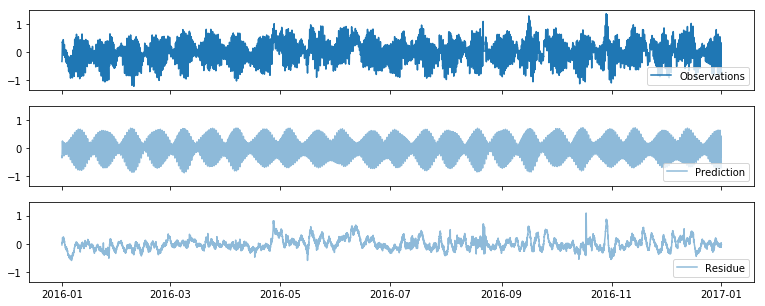

In [9]:
%matplotlib inline
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(13, 5))

ax0.plot(dd.index, dd.regnm, label=u'Observations')
ax0.legend(numpoints=1, loc='lower right')

ax1.plot(dd.index, mare['xout'].squeeze(), alpha=0.5, label=u'Prediction')
ax1.legend(numpoints=1, loc='lower right')

ax2.plot(dd.index, dd.regnm-mare['xout'].squeeze(), alpha=0.5, label=u'Residue')
_ = ax2.legend(numpoints=1, loc='lower right')
pl.show()

In [167]:
#%matplotlib inline
%matplotlib qt5

pl.close('all')

a1 = '2016-10-25'
a2 = '2016-11-4'

pl.figure(figsize = (12,8))
pl.subplot(311)
pl.plot(vento.index, vento.ws)
# pl.plot(vento.index, vento.wsmax)
pl.ylabel('Nos')
pl.legend(['Int Vento'], ncol=1, loc=2)
#pl.ylim(0,50)
pl.twinx()
pl.plot(vento.index, vento.wd,'r.')
pl.ylabel('Graus')
pl.legend(['Dir. Vento'], ncol=1, loc=1)
pl.ylim(0,360)
pl.grid()
pl.xlim(a1,a2)
pl.subplot(312)
pl.grid()
pl.plot(dd.index, dd.regnm)
pl.plot(dd.index, mare['xout'].squeeze())
pl.ylabel('Altura (m)')
pl.legend(['Mare Observada','Mare Astronomica'], ncol=2, loc=0)
pl.xlim(a1,a2)
pl.subplot(313)
pl.plot(dd.index, dd.regnm-mare['xout'].squeeze())
pl.ylabel('Amplitude (m)')
pl.legend(['Mare Meteorologica'])
pl.grid()
pl.xlim(a1,a2)


pl.savefig('fig/20161118')
pl.show()

In [164]:
#analise espectral de mare
%matplotlib qt5

pl.close('all')

print (dd.columns)

fs = 1 / (1.0 / 24) #ciclos por dia
nfft = len(dd) / 8

#calcula o espectro
aa_regnm = espec.espec1(dd.regnm, nfft, fs)
aa_prev = espec.espec1(dd.prev, nfft, fs)

pl.figure(figsize=(8,6))
pl.plot(aa_regnm[:,0], aa_regnm[:,1], linewidth=2.5, label='Obs')
pl.plot(aa_prev[:,0], aa_prev[:,1], linewidth=1.5, label='Prev')
pl.plot([aa_regnm[45,0], aa_regnm[45,0]],[0,10],'k--', markersize=0.1, alpha=0.5)
pl.plot([aa_regnm[90,0], aa_regnm[90,0]],[0,10],'k--', markersize=0.1, alpha=0.5)
pl.plot([aa_regnm[135,0], aa_regnm[135,0]],[0,10],'k--', markersize=0.1, alpha=0.5)
pl.plot([aa_regnm[180,0], aa_regnm[180,0]],[0,10],'k--', markersize=0.1, alpha=0.5)
pl.xscale('log', nonposy='clip')
pl.yscale('log', nonposy='clip')
pl.ylim(0,10)
pl.grid()
pl.xlabel('Freq. (cpd)')
pl.ylabel('m2/Hz')
pl.legend()

'''
pl.figure()
pl.subplot(221)
pl.loglog(aa_regnm[:,0], aa_regnm[:,1])
pl.subplot(222)
pl.loglog(aa_prev[:,0], aa_prev[:,1])
pl.subplot(223)
pl.loglog(aa_regnm[:,0], aa_regnm[:,1])
pl.loglog(aa_prev[:,0], aa_prev[:,1])
pl.subplot(224)
pl.loglog(aa_regnm[:,0], aa_regnm[:,1] - aa_prev[:,1])
'''

pl.show()


Index([u'reg', u'regnr', u'prev', u'regnm', u'prev_ttide', u'resid'], dtype='object')


In [110]:
%matplotlib qt5

pl.close('all')

pl.plot(aa_prev[:,0],'-o')

pl.show()

In [113]:
45, 90, 135, 180 

(45, 90, 135, 180)

In [112]:

135+45

180